In [40]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from numpy import median
from scipy.stats import ranksums
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import numpy as np
import scipy.stats

import os
import fnmatch

figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'

#### This script is designed to take metadata from specific animal files and then display it as a graph

In [2]:

animal = '//10.153.170.3/storage2/fabian/data/project/FS09/'

result=pd.DataFrame()

for dirpath, dirnames, files in os.walk(animal, topdown=True):
    fullstring = dirpath
    for metadata in files:
        if fnmatch.fnmatch(metadata, 'metadata_*'):
            print(metadata)
            print(dirpath)
            k=(dirpath+'/'+metadata)
            day = pd.read_csv(k,sep=" : ", header=None,engine='python')
            df=day.T
            df= df.rename(columns=df.iloc[0])
            df=df.drop(df.index[0])
            if int(df['Pellets'].values[0])>1:
                result = result.append(df, ignore_index=True,sort=False)
sorted_data = result.sort_values('Computer time was',)
sorted_data

metadata_20211006-145401.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211006-145401
metadata_20211007-155054.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211007-155054
metadata_20211011-090846.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211011-090846
metadata_20211014-152539.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211014-152539
metadata_20211015-164632.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211015-164632
metadata_20211019-162543.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211019-162543
metadata_20211022-131040.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211022-131040
metadata_20211023-183301.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211023-183301
metadata_20211025-135419.txt
//10.153.170.3/storage2/fabian/data/project/FS09/BPositions_FS09_20211025-135419
metadata_2

,Recording started on,Computer time was,ITI_time,time_in_cylinder,movement_collection_time,animal_ID,background_color,circle,position_change,light_off,...,high pellets,high_time_in_cylinder,invisible_time,invisible_count,invisible_list,Animal jumped,Recording_started_motive,Recording_timestamp_motive,Day,invisible circle
0,2021-10-06 14:54:01,1633524841.44,1.5,1.5,0.01,FS09,000,0.075,1000,200,...,25,0.5,60,0,[],0,0,0.0,156,NaN
1,2021-10-07 15:50:54,1633614654.77,1.5,2.5,0.01,FS09,000,0.075,2000,2000,...,6,0.5,60,0,[],2,0,0.0,156,0.15
2,2021-10-11 09:08:46,1633936126.1,1.5,1.5,0.01,FS09,000,0.075,2000,2000,...,15,0.5,60,0,[],0,0,0.0,156,0.15
3,2021-10-14 15:25:39,1634217939.48,1.5,1.5,0.01,FS09,000,0.075,2000,2000,...,21,0.5,60,0,[],0,0,0.0,156,0.15
4,2021-10-15 16:46:32,1634309192.19,1.5,1.5,0.01,FS09,000,0.075,10000,2000,...,35,0.5,60,0,[],0,0,0.0,156,0.15
5,2021-10-19 16:25:43,1634653543.62,1.5,1.5,0.01,FS09,000,0.075,10,2000,...,59,0.5,60,0,[],0,0,0.0,156,0.15
6,2021-10-22 13:10:40,1634901040.45,1.5,1.5,0.01,FS09,000,0.075,6,6,...,49,0.5,60,3,"[11, 17, 23]",0,0,0.0,156,0.15
7,2021-10-23 18:33:01,1635006781.93,1.5,1.5,0.01,FS09,000,0.075,6,6,...,52,0.5,60,2,"[11, 47]",26,0,0.0,156,0.15
8,2021-10-25 13:54:19,1635162859.45,1.5,1.5,0.01,FS09,000,0.075,6,6,...,53,0.5,60,1,[5],9,0,0.0,156,0.15
9,2021-10-26 16:43:31,1635259411.24,1.5,1.5,0.01,FS09,000,0.075,6,6,...,65,0.5,60,0,[],53,0,0.0,156,0.15


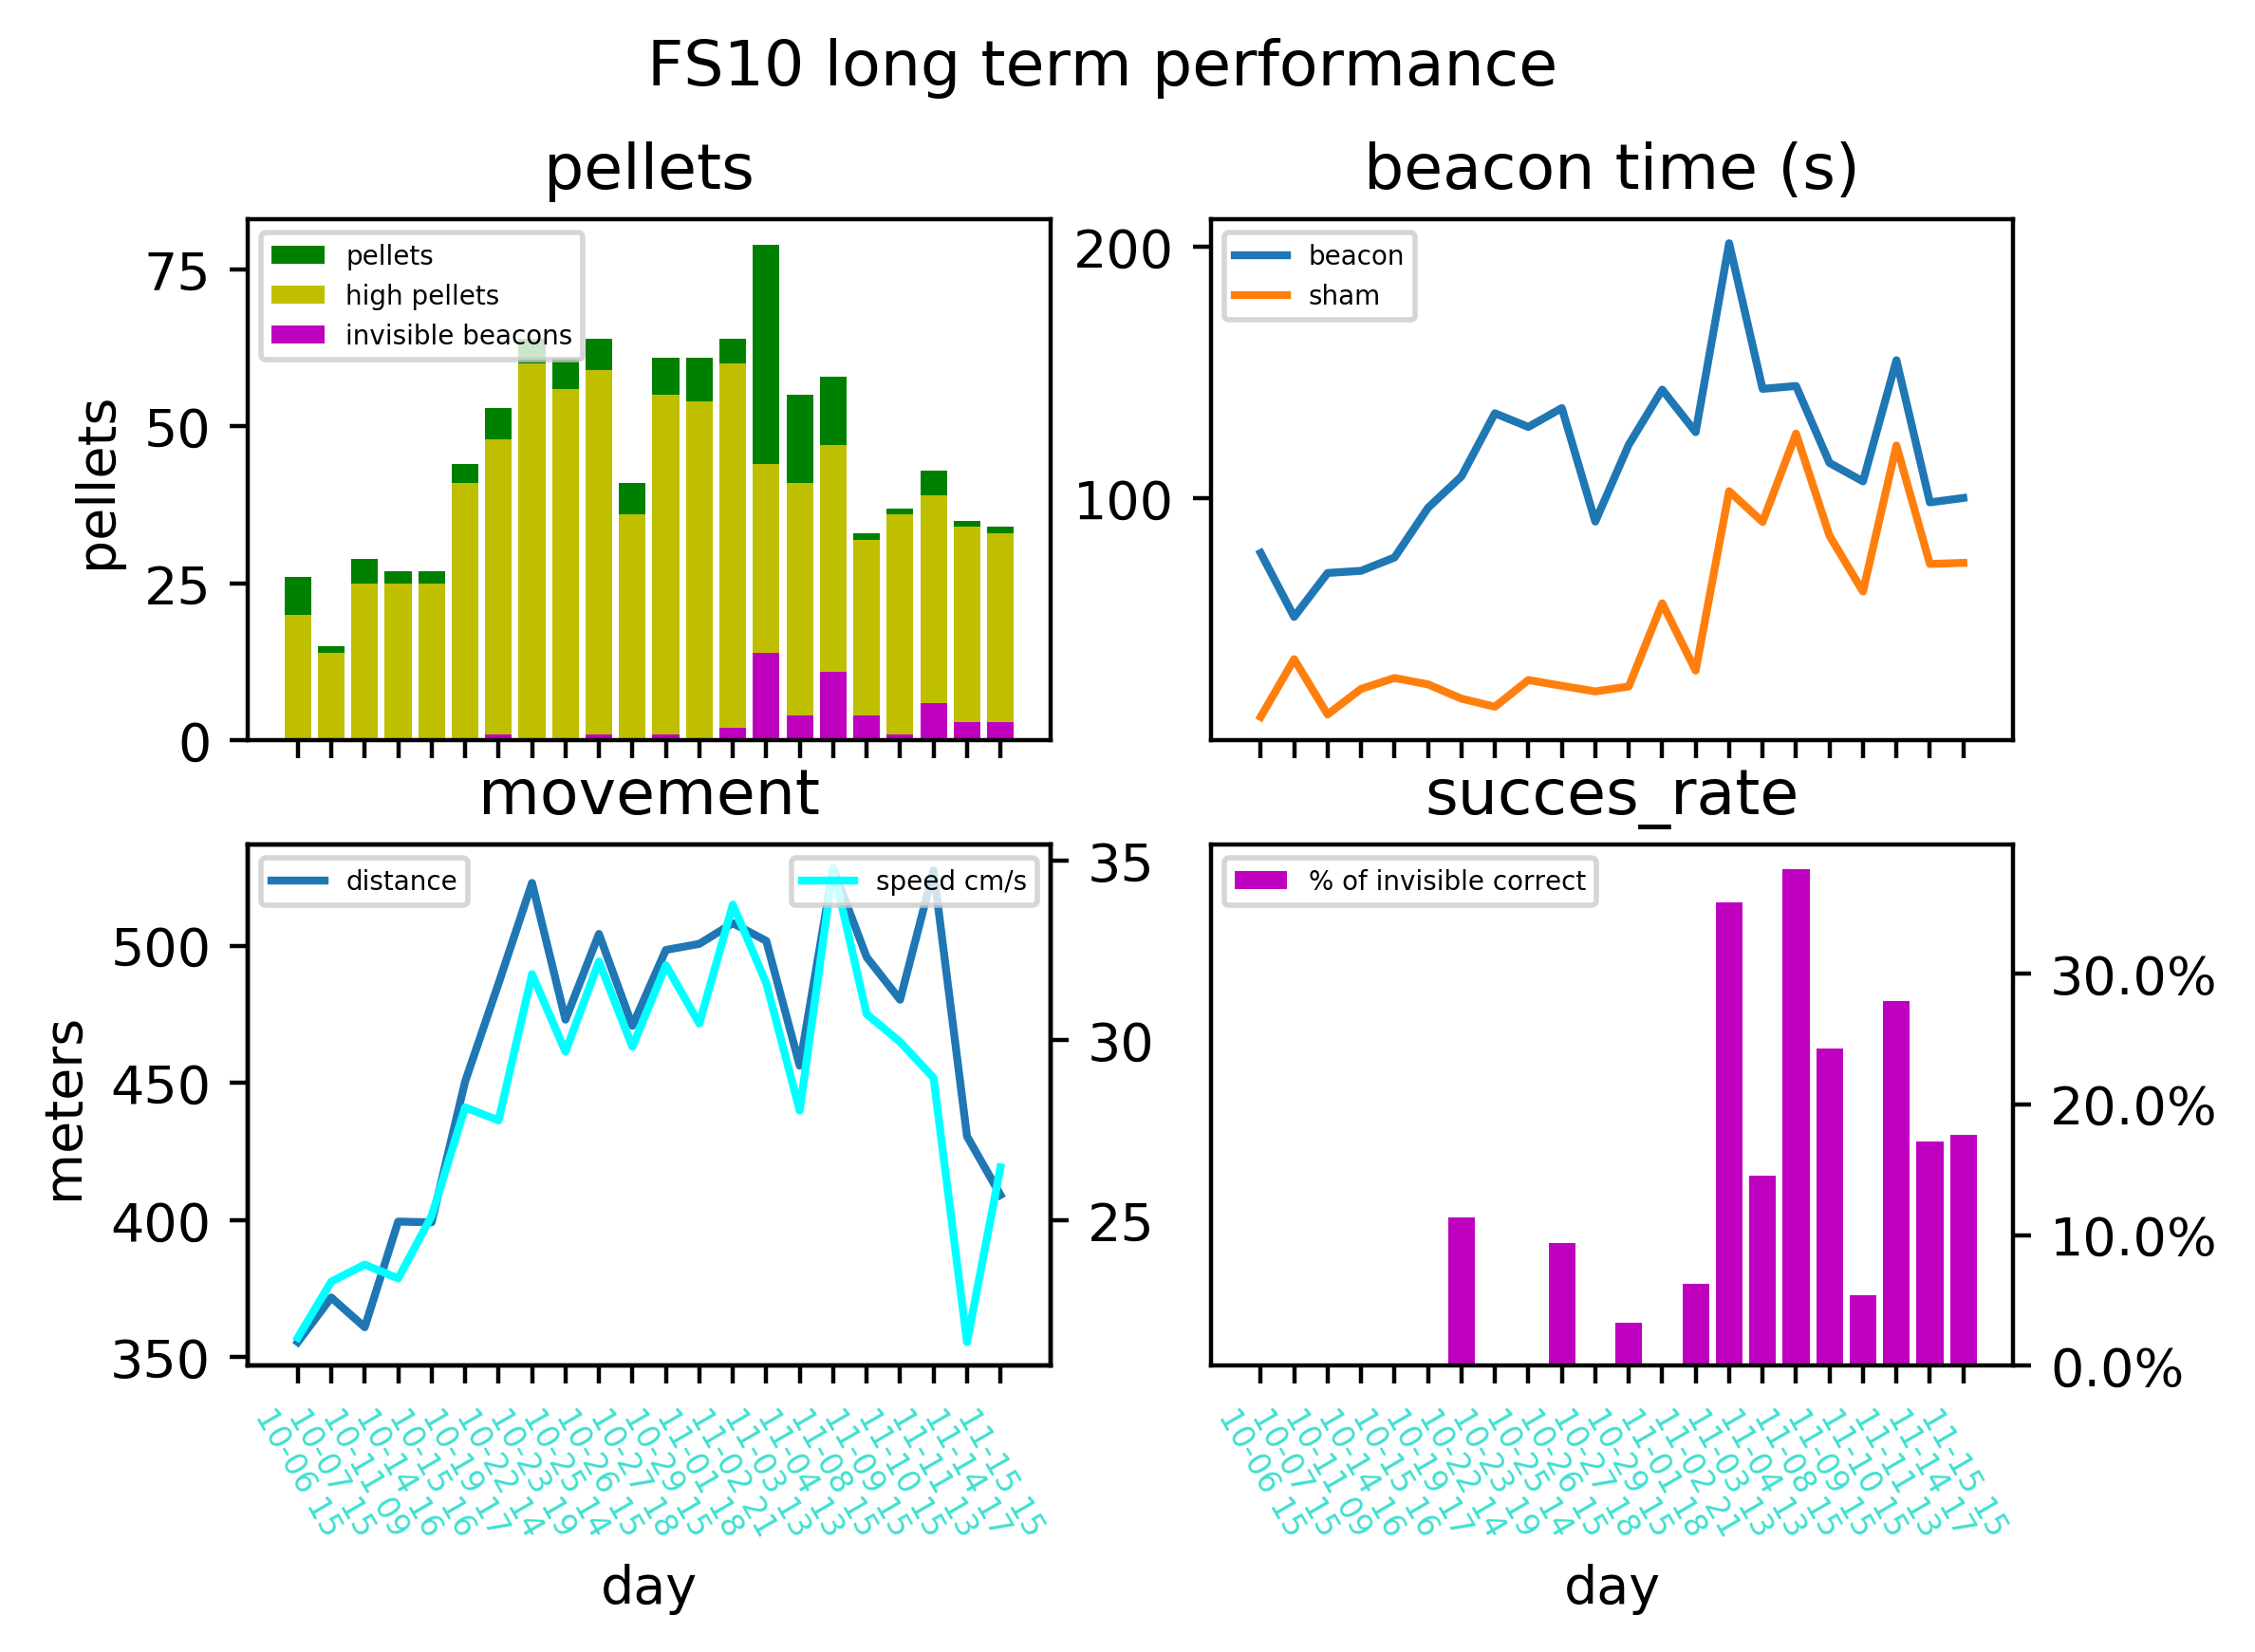

In [45]:
make_graphs('FS10')

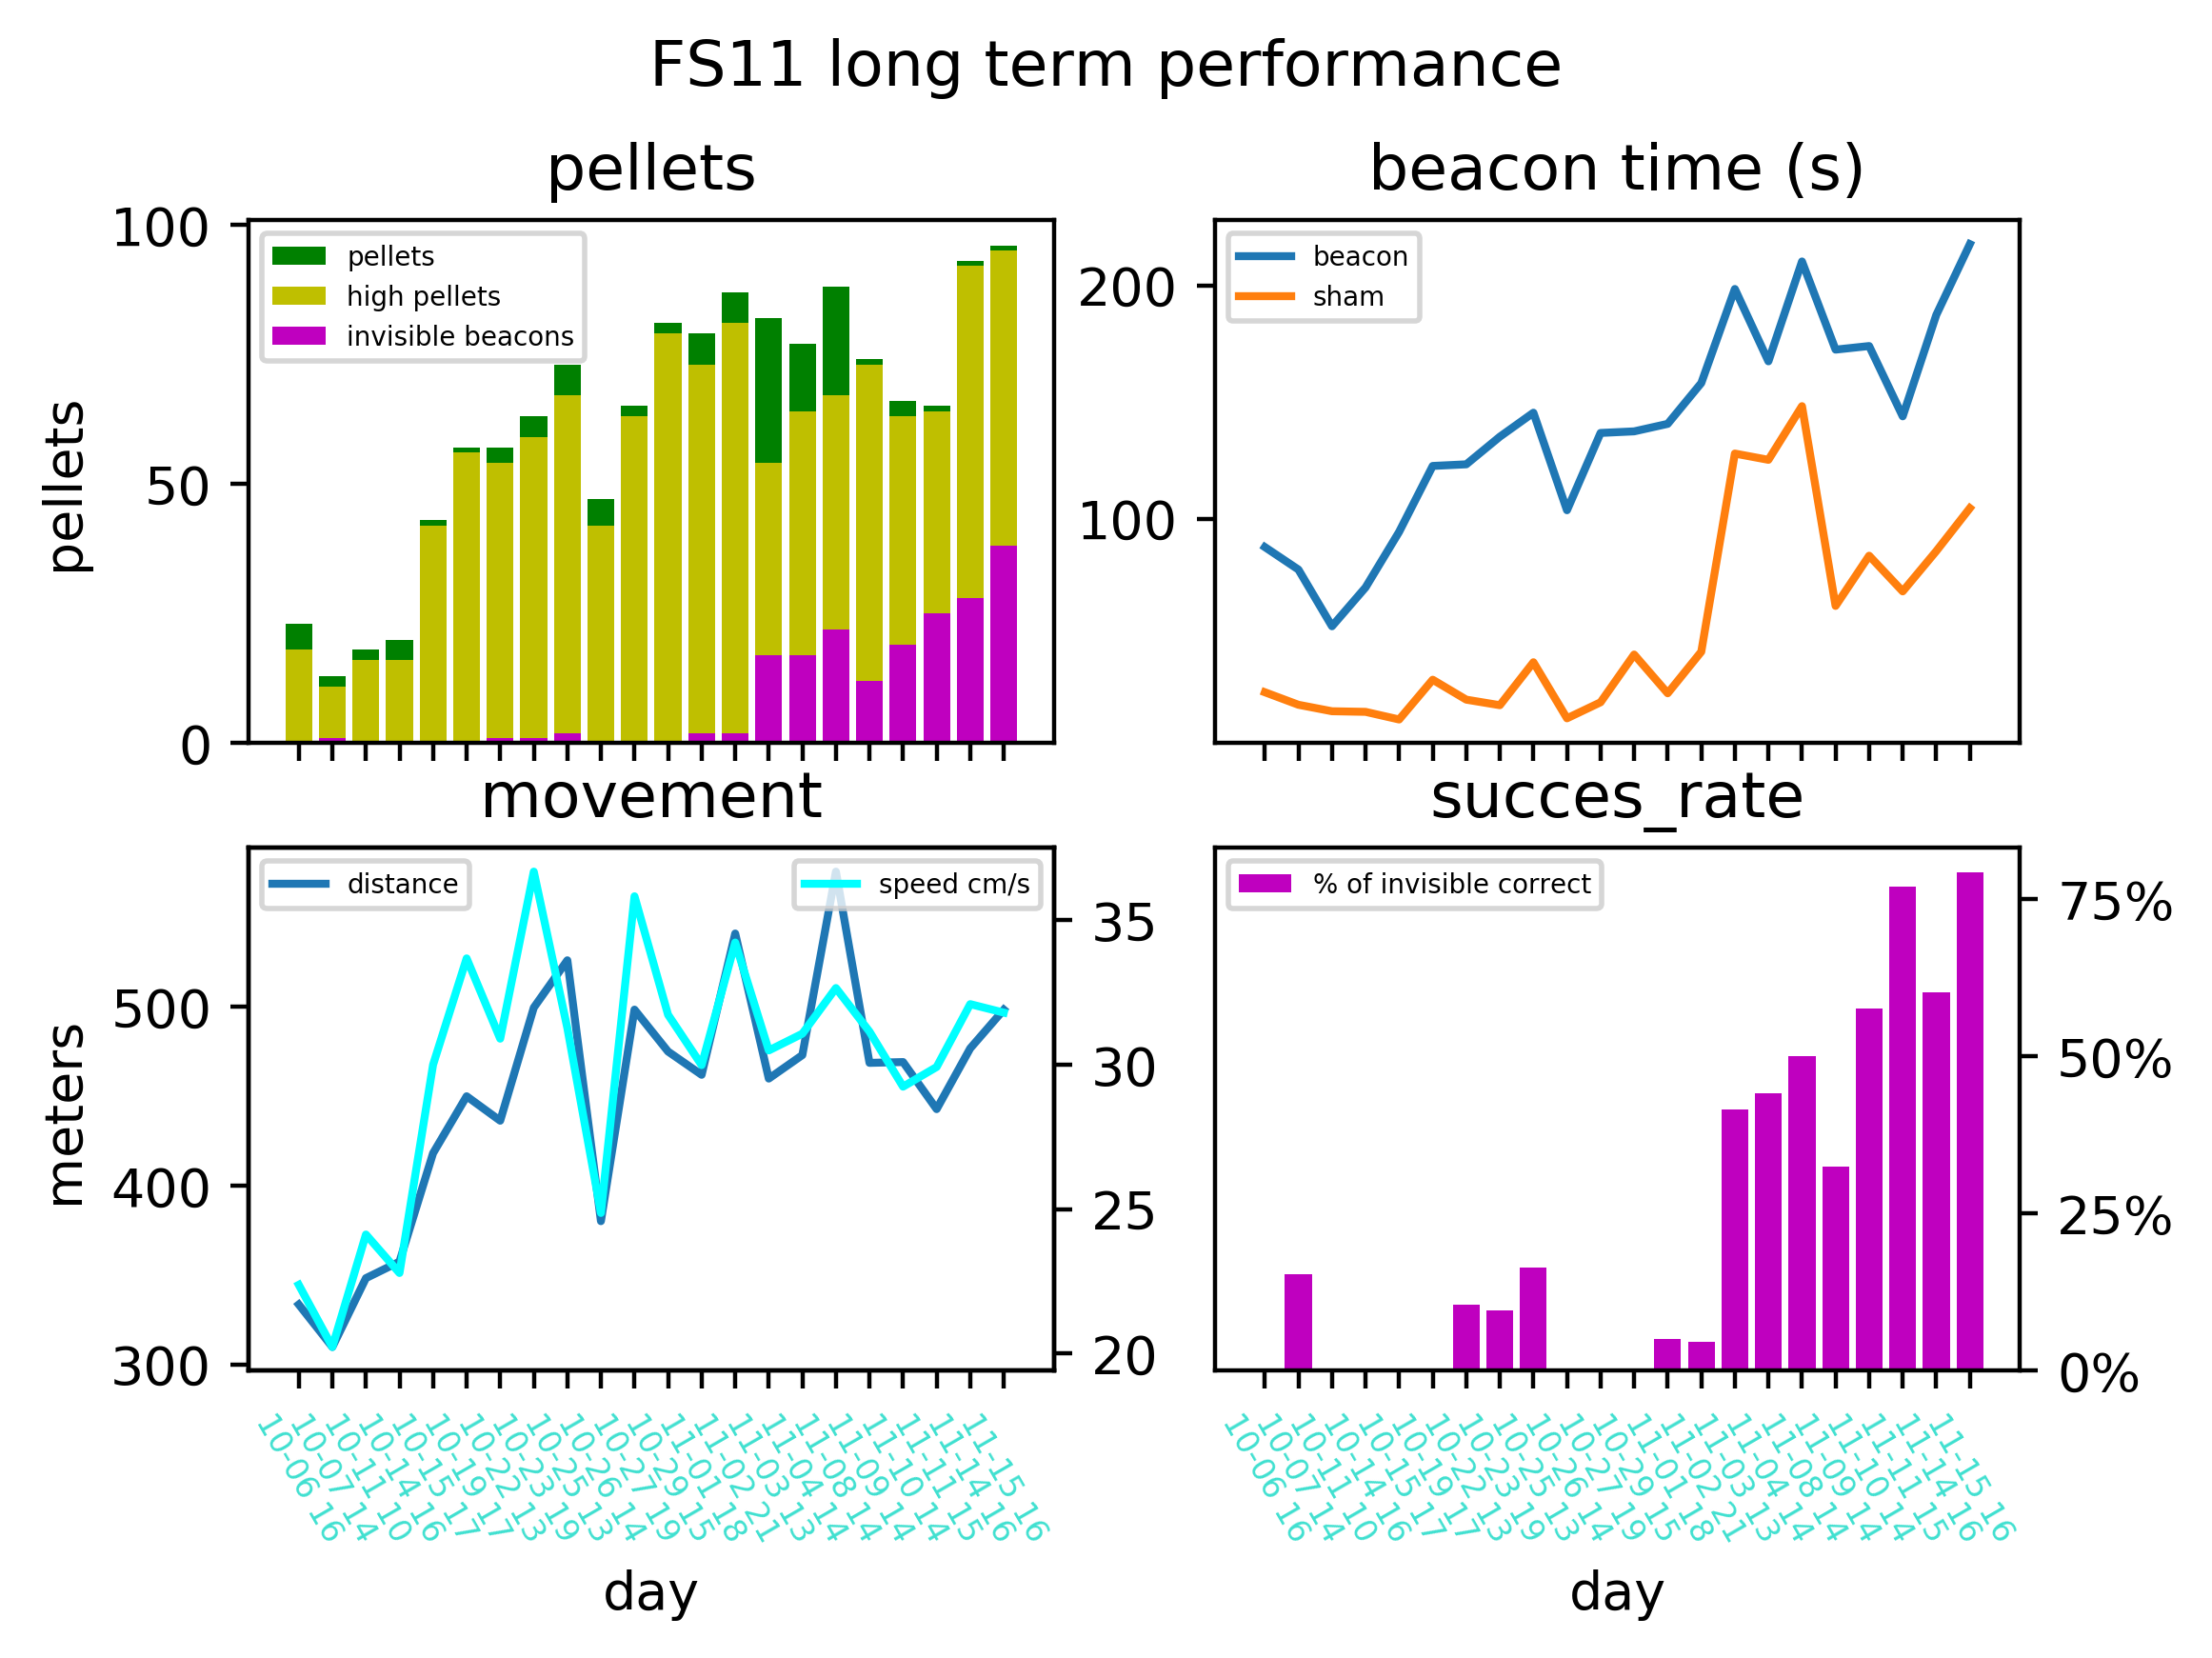

In [42]:
def make_graphs (animal_ID):
    result=pd.DataFrame()
    path = '//10.153.170.3/storage2/fabian/data/project/'+ animal_ID
    #print(path)
    for dirpath, dirnames, files in os.walk(path, topdown=True):
        fullstring = dirpath
        for metadata in files:
            if fnmatch.fnmatch(metadata, 'metadata_*'):
                #print(metadata)
                k=(dirpath+'/'+metadata)
                day = pd.read_csv(k,sep=" : ", header=None,engine='python')
                df=day.T
                df= df.rename(columns=df.iloc[0])
                df=df.drop(df.index[0])
                try:
                    if int(df['Pellets'].values[0])>1:
                        result = result.append(df, ignore_index=True,sort=False)
                except KeyError:
                    print("Bad session")
    sorted_data = result.sort_values('Computer time was',)
    sorted_data
    day_list_short=[]
    for day in sorted_data['Recording started on']:
        day_list_short.append(day[5:13])
    sorted_data['Pellets']= sorted_data['Pellets'].astype(int)
    sorted_data['high pellets']=sorted_data['high pellets'].astype(float)
    sorted_data['Sham']=sorted_data['Sham'].astype(float)
    sorted_data['Beacon']=sorted_data['Beacon'].astype(float)
    sorted_data['Distance']=sorted_data['Distance'].astype(float)
    sorted_data['Speed']=sorted_data['Speed'].astype(float)
    sorted_data['position_change']=sorted_data['position_change'].astype(int)
    sorted_data['light_off']=sorted_data['light_off'].astype(int)
    sorted_data['time_in_cylinder'] =  sorted_data['time_in_cylinder'].astype(float)
    sorted_data['background_color'] = sorted_data['background_color'].astype(str)
    sorted_data['invisible_count']= sorted_data['invisible_count'].astype(int)
    
    plt.tight_layout
    fig, ax = plt.subplots(2,2,dpi=400,sharex=True)
    fig.suptitle(animal_ID +' long term performance',y=1)
    ax[0][0].bar(day_list_short,sorted_data['Pellets'],label='pellets',color ='g')
    ax[0][0].bar(day_list_short,sorted_data['high pellets'],label='high pellets',color ='y')
    ax[0][0].bar(day_list_short,sorted_data['invisible_count'],label='invisible beacons',color ='m')
    ax[0][0].set_title('pellets')
    ax[0][0].legend(loc='upper left',prop={'size': 5})
    ax[1][1].set_xlabel('day')
    ax[1][0].set_xlabel('day')
    ax[0][0].set_ylabel('pellets')


    ax[0][1].plot(day_list_short,sorted_data['Beacon'],label = 'beacon')
    ax[0][1].plot(day_list_short,sorted_data['Sham'],label = 'sham')
    ax[0][1].legend(loc='upper left',prop={'size': 5})
    ax[0][1].set_title('beacon time (s)')
    #ax[0][1].set_ylabel('time in beacon')


    ax[1][0].plot(day_list_short,sorted_data['Distance'], label = 'distance')
    ax[1][0].legend(loc='upper left',prop={'size': 5})
    ax[1][0].set_title('movement')
    ax[1][0].set_ylabel('meters')
    ax[1][0].tick_params(axis="x", labelsize=6, labelrotation=-60, labelcolor="turquoise")

    ax[1][0]=ax[1][0].twinx()
    ax[1][0].plot(day_list_short,sorted_data['Speed'],label= 'speed cm/s',color = 'cyan')
    ax[1][0].legend(loc='upper right',prop={'size': 5})
    ax[1][0].tick_params(axis="x", labelsize=6, labelrotation=-60, labelcolor="turquoise")
    
    
    succes_rate=sorted_data['invisible_count']/(sorted_data['Pellets']/sorted_data['light_off'])
    
    ax[1][1].bar(day_list_short,succes_rate,label= '% of invisible correct',color = 'm')
    ax[1][1].legend(loc='upper left',prop={'size': 5})
    ax[1][1].set_title('succes_rate')
    ax[1][1].tick_params(axis="x", labelsize=6, labelrotation=-60, labelcolor="turquoise")
    ax[1][1].yaxis.tick_right()
    ax[1][1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))

    #fig.tight_layout()#pad=3.0
    
    #plt.show()
    plt.savefig('%sephys_long_term_perfomance %s.png'%(figures,animal_ID), dpi = 300)



    day_number = 0
#     for day in sorted_data['Pellets']:

    
    
    
    
#         print("%s Pellets dispensed : %s required time in cylinder %s background color: %s position change every: %s, invisible every: %s rear time reguired: %s" 
#               %(day_list_short[day_number],day,sorted_data['time_in_cylinder'][day_number],
#                 sorted_data['background_color'][day_number],sorted_data['position_change'][day_number],
#                 sorted_data['light_off'][day_number],sorted_data['high_time_in_cylinder'][day_number]))

#         day_number+=1

make_graphs('FS11')

In [34]:
36/48

0.75

In [19]:


animals=['FS08','FS09','FS10','FS11',]
def Succes_rate(animals):
    print(animals)
    for animal_ID in animals:
        print (animals)
        result=pd.DataFrame()
        path = '//10.153.170.3/storage2/fabian/data/project/'+ animal_ID
        print(path)
        for dirpath, dirnames, files in os.walk(path, topdown=True):
            fullstring = dirpath
            for metadata in files:
                if fnmatch.fnmatch(metadata, 'metadata_*'):
                    print(metadata)
                    k=(dirpath+'/'+metadata)
                    day = pd.read_csv(k,sep=" : ", header=None,engine='python')
                    df=day.T
                    df= df.rename(columns=df.iloc[0])
                    df=df.drop(df.index[0])
                    try:
                        if int(df['Pellets'].values[0])>1:
                            result = result.append(df, ignore_index=True,sort=False)
                    except KeyError:
                        print("Bad session")
        sorted_data = result.sort_values('Computer time was',)
        sorted_data
        day_list_short=[]
        for day in sorted_data['Recording started on']:
            day_list_short.append(day[5:13])
        sorted_data['Pellets']= sorted_data['Pellets'].astype(int)
        sorted_data['high pellets']=sorted_data['high pellets'].astype(float)
        sorted_data['Sham']=sorted_data['Sham'].astype(float)
        sorted_data['Beacon']=sorted_data['Beacon'].astype(float)
        sorted_data['Distance']=sorted_data['Distance'].astype(float)
        sorted_data['Speed']=sorted_data['Speed'].astype(float)
        sorted_data['position_change']=sorted_data['position_change'].astype(int)
        sorted_data['light_off']=sorted_data['light_off'].astype(int)
        sorted_data['time_in_cylinder'] =  sorted_data['time_in_cylinder'].astype(float)
        sorted_data['background_color'] = sorted_data['background_color'].astype(str)
        sorted_data['invisible_count']= sorted_data['invisible_count'].astype(int)
    plt.tight_layout
    fig, ax = plt.subplots(2,2,dpi=400,sharex=True)
    fig.suptitle(animal_ID +' succes rate',y=1)
    
    ax[0][0].bar(day_list_short,sorted_data['Pellets'],label='pellets',color ='g')
    ax[0][0].bar(day_list_short,sorted_data['high pellets'],label='high pellets',color ='y')
    ax[0][0].bar(day_list_short,sorted_data['invisible_count'],label='invisible beacons',color ='m')
    ax[0][0].set_title('pellets')
    ax[0][0].legend(loc='upper left',prop={'size': 5})
    ax[1][1].set_xlabel('day')
    ax[1][0].set_xlabel('day')
    ax[0][0].set_ylabel('pellets')
    plt.savefig('%sSucces_rate %s.png'%(figures,animal_ID), dpi = 300)
    
Succes_rate('FS11')    
    

FS11
FS11
//10.153.170.3/storage2/fabian/data/project/F


KeyError: 'Computer time was'